Сегодня мы попробуем поработать с библиотекой scikit-learn. Эта библиотека включает в себя множество алгоритмов, несколько тестовых наборов данных, функции для подсчета метрик и подбора параметров.

---

Scikit-learn появился как проект David Cournapeau на Google Summer of Code. Позднее к проекту присоединились другие разработчики, и первый релиз библиотеки состоялся 1 февраля 2010 года. Она быстро стало популярной за большое количество алгоритмов и простоту использования. sklearn полезна для экспериментов,  написания быстрых прототипов, участия в соревнованиях по анализу данных и во множестве других приложения. В тоже время, для промышленных проектов она может не подходить ввиду не оптимизированного кода и выбранного языка.



Возьмем стандартный датасет c помощью функции load_boston. Датасет содержит информацию о ценах на квартиры и какие-то параметры квартиры: близость к реке, криминогенная обстановка в районе и т.д.

In [11]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
data = load_boston()
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Прочитать описание датасета можно выполнив строчку: `print(data['DESCR'])`

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X, y = data['data'], data['target']

In [12]:
df = pd.DataFrame(X, columns=data['feature_names'])

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
print("Размер матрицы объектов: ", X.shape)
print("Рaзмер вектора y: ", y.shape)

Размер матрицы объектов:  (506, 13)
Рaзмер вектора y:  (506,)


Посмотрим на наши данные. Давайте построим  график того, как зависит цена от криминогенной обстановки. Для этого воспользуемся библиотекой matplotlib.

In [15]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Price')

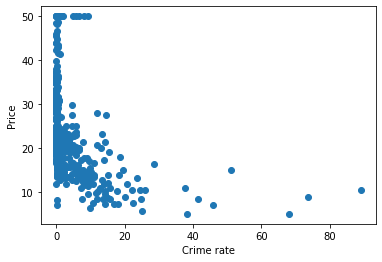

In [16]:
plt.scatter(X[:, 0], y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Как мы видим, все закономерно, дорогие квартиры находятся в районах с низким уровнем преступности.

In [17]:
from sklearn.model_selection import train_test_split

С помощью функции `train_test_split` разобьем выборку на `train` и `test`.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

В sklearn, разные методы лежат в разных модулях. Например в linear_model находятся линейные модели, в neighbors - методы основанные на ближайших соседях.

Импортируем алгоритм knn из sklearn. Работа с алгоритмами машинного обучения в библиотеке состоит из трех этапов.



1.   Создание объекта, который будет реализовывать алгоритм.
2.   Вызов `fit`: обучение модели на тренировочной подвыборке
3.   Вызов `predict`: получение предсказаний на тестовой выборке



In [22]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [23]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
predictions = knn.predict(X_test)

Отлично! Мы получили предсказания. Посчитаем метрику, соответствующая функция есть в scikit-learn! Будет считать средне квадратичную ошибку, так как мы решаем задачу регрессии.

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y_test, predictions)

38.10278823529412

Давайте попробуем сделать лучше! У нашего алгоритма есть множество гиперпараметров: количество соседей, параметры метрики и веса. Запустим поиск по сетке гиперараметров, алгоритм переберет все возможные комбинации, посчитает метрику для каждого набора и выдаст лучший набор.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

Параметр cv=5 говорит, что во время поиска оптимальных парамертов будет использоваться кросс-валидация с 5 фолдами. Давайте вспомним, что это такое: 

![alt text](https://miro.medium.com/max/700/1*rgba1BIOUys7wQcXcL4U5A.png)
https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

В нашем случае, выборка будет разделена на 5 частей и на каждой из 5 итераций, часть данных будет становиться тестовой выборкой, а другая часть - обучающей. Посчитав метрики на каждой итерации, мы сможем усреднить их в конце и получить достаточно точную оценку качества нашего алгоритма.

In [31]:
grid_searcher.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [32]:
grid_searcher.fit(X_train, y_train);

Попросим предсказание лучшей модели.

In [33]:
best_predictions = grid_searcher.predict(X_test)

In [34]:
mean_squared_error(y_test, best_predictions)

24.10924728496591

Давайте посмотрим на качество алгоритма в зависимости от количества соседей. Качество будем оценивать на обучающей выборке 


In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [44]:
metrics = []
for n in range(1, 40, 2):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    #metrics.append(np.mean(scores))
    score = mean_squared_error(y_test, knn.predict(X_test))
    metrics.append(score)

In [45]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Number of neightbors')

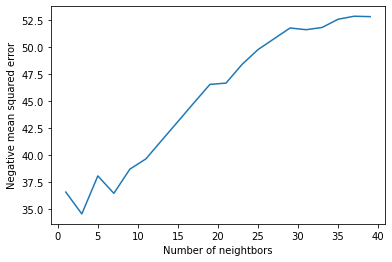

In [46]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')

Помимо готовых датасетов, в библиотеке sklearn можно найти функции для генерации искусственных данных. Давайте сгенерируем датасет для классификации и визуализируем его.

In [53]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100)

In [54]:
X.shape

(100, 2)

In [57]:
y[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [55]:
X[:10]

array([[-0.57211666,  0.82017225],
       [-0.71834935,  0.69568255],
       [-0.1595999 ,  0.98718178],
       [ 1.        ,  0.        ],
       [-0.90096887,  0.43388374],
       [ 0.53746171, -0.38659931],
       [ 0.00205461,  0.43592978],
       [ 0.67230089,  0.740278  ],
       [ 1.57211666, -0.32017225],
       [ 1.67230089, -0.240278  ]])

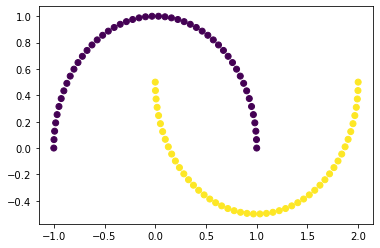

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [60]:
X, y = make_moons(n_samples=1000,noise=0.25)

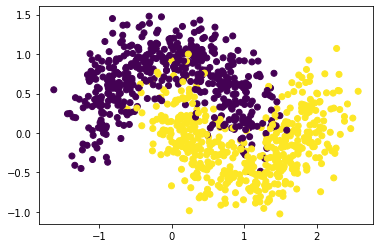

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Мы получили два слегка зашумленных месяца. Давайте обучим knn на этих данных и визуализируем пространство предсказаний.



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
#accuracy score

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(knn_clf.predict(X_test), y_test)

0.93

Для визуализации построим массив, который будет содержать в себе все точки в окрестности данных с некоторым шагом.

In [74]:
#np.linspace(начало массива, конец массива, кол-во точек)
#np.meshgrid - возвращает матрицу

x_grid, y_grid = np.meshgrid(np.linspace(-2.0, 3.0, 100), np.linspace(-2.0, 2.0, 100))

print(x_grid[:1])
print(y_grid[:2])

#np.stack - объединение массивов
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)
xy

[[-2.         -1.94949495 -1.8989899  -1.84848485 -1.7979798  -1.74747475
  -1.6969697  -1.64646465 -1.5959596  -1.54545455 -1.49494949 -1.44444444
  -1.39393939 -1.34343434 -1.29292929 -1.24242424 -1.19191919 -1.14141414
  -1.09090909 -1.04040404 -0.98989899 -0.93939394 -0.88888889 -0.83838384
  -0.78787879 -0.73737374 -0.68686869 -0.63636364 -0.58585859 -0.53535354
  -0.48484848 -0.43434343 -0.38383838 -0.33333333 -0.28282828 -0.23232323
  -0.18181818 -0.13131313 -0.08080808 -0.03030303  0.02020202  0.07070707
   0.12121212  0.17171717  0.22222222  0.27272727  0.32323232  0.37373737
   0.42424242  0.47474747  0.52525253  0.57575758  0.62626263  0.67676768
   0.72727273  0.77777778  0.82828283  0.87878788  0.92929293  0.97979798
   1.03030303  1.08080808  1.13131313  1.18181818  1.23232323  1.28282828
   1.33333333  1.38383838  1.43434343  1.48484848  1.53535354  1.58585859
   1.63636364  1.68686869  1.73737374  1.78787879  1.83838384  1.88888889
   1.93939394  1.98989899  2.04040404 

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  2.        ],
       [ 2.94949495,  2.        ],
       [ 3.        ,  2.        ]])

In [75]:
predicted = knn_clf.predict(xy)

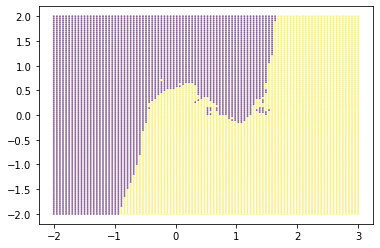

In [80]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.5, s=1)
plt.show()

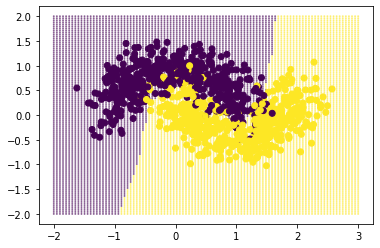

In [81]:
plt.scatter(xy[:, 0], xy[:, 1], c=predicted, alpha=0.5, s=1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

На картинке вы можете увидеть исходные данные и границу, которую knn возвел между классами. Поэксперементируйте с параметром n_neighbors и посмотрите, как он влияет на итоговый результат.